#### Setup

In [1]:
from qiskit_transpiler import get_pm
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_provider import IBMProvider
from qiskit_experiments.library import InterleavedRB
import qiskit.circuit.library as circuits
from qiskit import QuantumCircuit

In [2]:
#Setting the IBM provider
api_file = "../../../ibm_API_key"
with open(api_file, "r") as f:
        api_key = f.readline().strip()
provider = IBMProvider(api_key, instance='ibm-q-ncsu/nc-state/quantum-compiler')
backend = provider.get_backend('ibmq_mumbai')

#### Circuit to only pass as a gate

In [3]:
gate_circuit = QuantumCircuit(2, name='custom_rzx')
gate_circuit.rzx(np.pi/2,0,1)
custom_rzx = gate_circuit.to_gate()

#### Circuit to pass for getting the calibration specific to the qubit

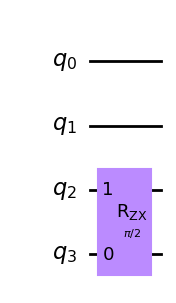

In [4]:
calibration_circuit = QuantumCircuit(4)
calibration_circuit.rzx(np.pi/2,3,2)
calibration_circuit.draw('mpl')

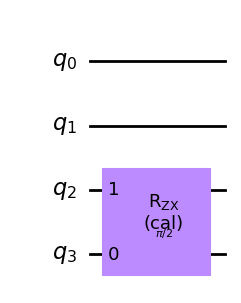

In [5]:
pm = get_pm(backend)
calibrated_circuit = pm.run(calibration_circuit)
calibrated_circuit.draw('mpl')

In [6]:
calibrated_circuit.calibrations

{'rzx': {((3, 2),
   (1.5707963267948966,)): ScheduleBlock(ScheduleBlock(ScheduleBlock(Play(GaussianSquare(duration=688, sigma=64, width=432.0, amp=0.24852273944723735, angle=-1.9544697125140549), ControlChannel(6)), name="rescale_cr_inst", transform=AlignLeft()), ScheduleBlock(Play(GaussianSquare(duration=688, sigma=64, width=432.0, amp=0.04332670533667969, angle=-0.033645972852721674), DriveChannel(2)), name="rescale_cr_inst", transform=AlignLeft()), name="block1", transform=AlignLeft()), ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=-0.80342292001501, amp=0.16154381850291183, angle=0.0, name='Xp_d3'), DriveChannel(3), name='Xp_d3'), name="x", transform=AlignLeft()), ScheduleBlock(ScheduleBlock(Play(GaussianSquare(duration=688, sigma=64, width=432.0, amp=0.24852273944723738, angle=1.1871229410757382), ControlChannel(6)), name="rescale_cr_inst", transform=AlignLeft()), ScheduleBlock(Play(GaussianSquare(duration=688, sigma=64, width=432.0, amp=0.04332670533667969, angle=3.107946

In [7]:
calibration = list(calibrated_circuit.calibrations['rzx'].values())[0]
calibration

ScheduleBlock(ScheduleBlock(ScheduleBlock(Play(GaussianSquare(duration=688, sigma=64, width=432.0, amp=0.24852273944723735, angle=-1.9544697125140549), ControlChannel(6)), name="rescale_cr_inst", transform=AlignLeft()), ScheduleBlock(Play(GaussianSquare(duration=688, sigma=64, width=432.0, amp=0.04332670533667969, angle=-0.033645972852721674), DriveChannel(2)), name="rescale_cr_inst", transform=AlignLeft()), name="block1", transform=AlignLeft()), ScheduleBlock(Play(Drag(duration=160, sigma=40, beta=-0.80342292001501, amp=0.16154381850291183, angle=0.0, name='Xp_d3'), DriveChannel(3), name='Xp_d3'), name="x", transform=AlignLeft()), ScheduleBlock(ScheduleBlock(Play(GaussianSquare(duration=688, sigma=64, width=432.0, amp=0.24852273944723738, angle=1.1871229410757382), ControlChannel(6)), name="rescale_cr_inst", transform=AlignLeft()), ScheduleBlock(Play(GaussianSquare(duration=688, sigma=64, width=432.0, amp=0.04332670533667969, angle=3.1079466807370713), DriveChannel(2)), name="rescale_

In [8]:
backend.target.add_instruction(custom_rzx, {(3,2): InstructionProperties(calibration=calibration)})

In [9]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (3,2) # make sure it is the qubit added in the backend target

int_exp = InterleavedRB(
    custom_rzx, qubits, lengths, num_samples=num_samples, seed=seed, backend=backend)

In [10]:
int_expdata = int_exp.run(backend).block_for_results()
int_results = int_expdata.analysis_results()

Job data not added for errorred job [Job ID: cq2rfhpd7we0008sjhsg]
Error message: Failed to start program in HAL component


In [11]:
# View result data
display(int_expdata.figure(0))
for result in int_results:
    print(result)

ExperimentEntryNotFound: 'Figure 0 not found.'

In [ ]:
int_exp.circuits()[1].draw(output='mpl')

In [ ]:
# you can see that the transpiled circuits contain the calibrations
int_exp._transpiled_circuits()[1].draw(output='mpl')